# Importing Appropriate Modules 

In [25]:
%pylab inline
from parcels import Field, FieldSet, ParticleSet, JITParticle, plotTrajectoriesFile, AdvectionRK4,ErrorCode
import numpy as np
import os
from datetime import timedelta
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Defining the Files that are needed to Run Parcels

Globfiles = This is the exact files that the synthetic particle tracker will use from GlobCurrent. It then uses files from 20080101 to 20080110 for example to run the synthetic particle tracker. This allows for the correct time period to be used during comparisons.

In [2]:

"""Purpose: download latest hourly ocean forecasts from CMEMS GLOBAL-ANALYSIS-FORECAST-PHY-001-024-HOURLY-T-U-V-SSH

Dependencies: python 2.7, motu-client (do 'pip install motu-client'), datetime, timedelta

Creation Date: 21 Aug 2018

Author: bjornb <backeb@gmail.com> Bjorn Backeberg

Log: <Date: Author - Comment>
    21 Aug 2018: bjornb - adapted script from Mostafa Bakhoday-Paskyabi <Mostafa.Bakhoday@nersc.no>
"""
from __future__ import print_function
import os
from datetime import datetime, timedelta

startTime = datetime.now()

# here we define all the bits and pieces that get put in the 'runcommand' variable used to call the motu-client
path2motuClient = '/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/'

# here we specifiy username and password to CMEMS
usrname = 'bbackeberg'
passwd = 'iaTmwJ7D'

# here-34.153011, 18.822664
# [lon-lower-left-corner, lon-upper-right-corner, lat-lower-left-corner, lat-upper-right-corner]
18.8113863
domain = [15, 20, -36, -33]

startDate = datetime.now() - timedelta(hours = 48); startDate = startDate.replace(minute = 30, second = 0, microsecond  = 0)
endDate = datetime.now() + timedelta(hours = 48); endDate = endDate.replace(minute = 30, second = 0, microsecond  = 0)

# thetao = Temperature in degrees C, zos = SSH in m, uo = Eastward velocity in m/s, vo = Northward velocity in m/s
varList = ['thetao', 'zos', 'uo', 'vo']
varStr = ''
for var in varList:
    varStr += ' --variable '+var

# NOTE only surface fields available hourly
depths = [0.493, 0.4942]

path2saveData = os.getcwd()+'/'
fname = 'mercator_ocean_1.nc'

# create the runcommand string
runcommand = 'python '+path2motuClient+'/motu-client.py --quiet'+ \
        ' --user '+usrname+' --pwd '+passwd+ \
        ' --motu http://nrt.cmems-du.eu/motu-web/Motu'+ \
        ' --service-id GLOBAL_ANALYSIS_FORECAST_PHY_001_024-TDS'+ \
        ' --product-id global-analysis-forecast-phy-001-024-hourly-t-u-v-ssh'+ \
        ' --longitude-min '+str(domain[0])+' --longitude-max '+str(domain[1])+ \
        ' --latitude-min '+str(domain[2])+' --latitude-max '+str(domain[3])+ \
        ' --date-min "'+str(startDate.strftime('%Y-%m-%d %H:%M:%S'))+'" --date-max "'+str(endDate.strftime('%Y-%m-%d %H:%M:%S'))+'"'+ \
        ' --depth-min '+str(depths[0])+' --depth-max '+str(depths[1])+ \
        varStr+ \
        ' --out-dir '+path2saveData+' --out-name '+fname

# run the runcommand, i.e. download the data specified above
print('fetching latest mercator ocean forecast from CMEMS and making datastack')
os.system(runcommand)

print(datetime.now() - startTime)


fetching latest mercator ocean forecast from CMEMS and making datastack
0:00:34.420641


In [3]:
startDate

datetime.datetime(2019, 6, 10, 14, 30)

In [27]:
from parcels import Field, FieldSet, ParticleSet, JITParticle, plotTrajectoriesFile, AdvectionRK4,ErrorCode
import numpy as np
import os
from datetime import timedelta
import xarray as xr
import netCDF4

globfiles = '/Users/hart-davis/Desktop/Scripts/mercator_ocean_1.nc'

nc = xr.open_dataset(globfiles)
u = nc.uo         .data
v = nc.vo         .data
u[(u==0)] = np.nan
v[(v==0)] = np.nan
lonu = nc.longitude.data
latu = nc.latitude .data
#print(nc.time.data)
time = nc.time

In [37]:
u[(u==0)] = np.nan
wv[(v==0.0)] = np.nan

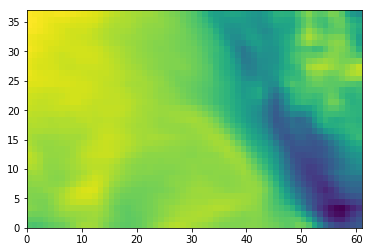

In [38]:
plt.pcolormesh(wv[0,0])

In [5]:
from datetime import datetime 

#date = datetime.now() 
date = datetime(2019,6,4,16,00)
day_n = '{:02d}'.format(date.day)

month_n = '{:02d}'.format(date.month)

year_n = str(date.year)
hour_n = '{:02d}'.format(date.hour)
dayofyear = date.timetuple().tm_yday


In [6]:
dayday = datetime(2019,6,4,16)

In [7]:
dayday

datetime.datetime(2019, 6, 4, 16, 0)

In [8]:
from glob import glob

date = datetime(2019,6,4,18,00)
day_n = '{:02d}'.format(date.day)

month_n = '{:02d}'.format(date.month)

year_n = str(date.year)
hour_n = '{:02d}'.format(date.hour)
dayofyear = date.timetuple().tm_yday


ncw = xr.open_dataset("http://www.ifremer.fr/opendap/cerdap1/globcurrent"
        "-third-party/model/wind/ecmwf_0125/2019/"+str(dayofyear)+"/METEOFRANCE_CEP_"+year_n+month_n+day_n+
                      "T"+hour_n+"Z.nc")

ncw = ncw.sel(longitude=slice(nc.variables["longitude"][:].min(),nc.variables["longitude"][:].max()),
              latitude= slice(nc.variables["latitude"][:].min(),nc.variables["latitude"][:].max()))

uw = ncw.u10m         .data
vw = ncw.v10m         .data
lonw = ncw.longitude.data
latw = ncw.latitude .data
timew = np.linspace(0,len(ncw.time.data),len(ncw.time.data))
from scipy import interpolate
x = lonw
y = latw
xx, yy = np.meshgrid(x, y)

t = timew

In [9]:
un = []
vn = []
for i in range(0,1):
    z = uw
    a = vw
    f = interpolate.interp2d(x, y, z[0,0], kind='linear')
    g = interpolate.interp2d(x, y, a[0,0], kind='linear')


    xnew = lonu
    ynew = latu
    unew = f(xnew, ynew)
    vnew = g(xnew, ynew)
    un.append(unew)
    vn.append(vnew)

unew = np.array(un)
vnew = np.array(vn)

unew = np.repeat(unew[np.newaxis,:,:], len(time), axis=0)
vnew = np.repeat(vnew[np.newaxis,:,:], len(time), axis=0)

In [10]:
import math
def objectname(uw,vw,state):
    if state == 'PIW State Unknown':
        ang = 40
        uwi = ((uw * 0.01) + 0.08)*math.sin(ang)
        vwi = ((vw * 0.01) + 0.08)*math.cos(ang)
    elif state == 'PIW with lifejacket':
        ang = 45
        uwi = ((uw * 0.02))*math.sin(ang)
        vwi = ((vw * 0.02))*math.cos(ang)
    elif state == 'PIW verticle':
        ang = 25        
        uwi = ((uw * 0.01) + 0.08)*math.sin(ang)
        vwi = ((vw * 0.01) + 0.08)*math.cos(ang)
    elif state == 'PIW sitting \ huddled':
        ang = 25        
        uwi = ((uw * 0.02) + 0.01)*math.sin(ang)
        vwi = ((vw * 0.02) + 0.01)*math.cos(ang)
    elif state == 'PIW verticle':
        ang = 40
        uwi = ((uw * 0.02) + 0.08)*math.sin(ang)
        vwi = ((vw * 0.02) + 0.08)*math.cos(ang)
    elif state == 'No ballast pockets, general type':
        ang = 38
        uwi = ((uw * 0.05) + 0.03)*math.sin(ang)
        vwi = ((vw * 0.05) + 0.03)*math.cos(ang)
    elif state == 'No ballast pockets, no canopy, no drouge':
        ang = 32
        uwi = ((uw * 0.06) + 0.20)*math.sin(ang)
        vwi = ((vw * 0.06) + 0.20)*math.cos(ang)
    elif state == 'No ballast pockets, with canopy, with drouge':
        ang = 38
        uwi = ((uw * 0.03))*math.sin(ang)
        vwi = ((vw * 0.03))*math.cos(ang)
    elif state == 'Shallow ballast pocket with canopy, Capsized':
        ang = 12
        uwi = ((uw * 0.02) - 0.10)*math.sin(ang)
        vwi = ((vw * 0.02) - 0.10)*math.cos(ang)     
    elif state == '4 to 6 man, with canopy, with  drouge':
        ang = 20
        uwi = ((uw * 0.03) + 0.04)*math.sin(ang)
        vwi = ((vw * 0.03) + 0.04)*math.cos(ang)
    elif state == '15 to 25 man, with canopy, with  drouge':
        ang = 15
        uwi = ((uw * 0.04) + 0.08)*math.sin(ang)
        vwi = ((vw * 0.04) + 0.08)*math.cos(ang)
    elif state == '4 to 6 man, with canopy, no drouge':
        ang = 32
        uwi = ((uw * 0.04) + 0.12)*math.sin(ang)
        vwi = ((vw * 0.04) + 0.12)*math.cos(ang)
    elif state == 'Sea kayak, with person':
        ang = 20
        uwi = ((uw * 0.01) + 0.26)*math.sin(ang)
        vwi = ((vw * 0.01) + 0.26)*math.cos(ang)
    elif state == 'Homemade wood raft':
        ang = 25
        uwi = ((uw * 0.02) + 0.18)*math.sin(ang)
        vwi = ((vw * 0.02) + 0.18)*math.cos(ang)
    elif state == 'Homemade wood raft, with sail':
        ang = 45
        uwi = ((uw * 0.08) + 0.18)*math.sin(ang)
        vwi = ((vw * 0.08) + 0.18)*math.cos(ang)       
    elif state == 'Surfboard with person':
        ang = 20
        uwi = ((uw * 0.02))*math.sin(ang)
        vwi = ((vw * 0.02))*math.cos(ang)
    elif state == 'Windsurfer with person, sail and mast in the water':
        ang = 16
        uwi = ((uw * 0.03) + 0.1)*math.sin(ang)
        vwi = ((vw * 0.03) + 0.1)*math.cos(ang)
    elif state == 'Mono hull, keel, medium displacement':
        ang = 65
        uwi = ((uw * 0.04))*math.sin(ang)
        vwi = ((vw * 0.04))*math.cos(ang)     
    elif state == 'Enclosed Lifeboat':
        ang = 30
        uwi = ((uw * 0.04) - 0.08)*math.sin(ang)
        vwi = ((vw * 0.04) - 0.08)*math.cos(ang)
    elif state == 'Vessel with outboard motors no drouge':
        ang = 35
        uwi = ((uw * 0.07) + 0.04)*math.sin(ang)
        vwi = ((vw * 0.07) + 0.04)*math.cos(ang)
    elif state == 'Flat bottomed Boat, Boston whaler':
        ang = 30
        uwi = ((uw * 0.04) + 0.04)*math.sin(ang)
        vwi = ((vw * 0.04) + 0.04)*math.cos(ang)
    elif state == 'V hull boat':
        ang = 25
        uwi = ((uw * 0.0051) + 0.10)*math.sin(ang)
        vwi = ((vw * 0.0051) + 0.10)*math.cos(ang)
#     elif state == 'V hull boat':
#         uwi = (uw * 0.03) + 0.08
#         vwi = (vw * 0.03) + 0.08
    elif state == 'Sport fisher, centre open console':
        ang = 30
        uwi = ((uw * 0.06) + 0.09)*math.sin(ang)
        vwi = ((vw * 0.06) + 0.09)*math.cos(ang)
    elif state == 'Commercial fishing vessel type unknown':
        ang = 65
        uwi = ((uw * 0.04) + 0.06)*math.sin(ang)
        vwi = ((vw * 0.04) + 0.06)*math.cos(ang)
    elif state == 'Coastal freighter':
        ang = 65
        uwi = ((uw * 0.03))*math.sin(ang)
        vwi = ((vw * 0.03))*math.cos(ang)
    elif state == 'Fishing vessel general debris':
        ang = 15
        uwi = ((uw * 0.02))*math.sin(ang)
        vwi = ((vw * 0.02))*math.cos(ang)
    elif state == 'Cubic meter bait box, loading unknown':
        ang = 30
        uwi = ((uw * 0.04) + 0.04)*math.sin(ang)
        vwi = ((vw * 0.04) + 0.04)*math.cos(ang)
    else:
        print ("object note available")
    print (state)
    return uwi, vwi,state

In [11]:
wu,wv,state = objectname(unew, vnew, state= "Homemade wood raft, with sail")

Homemade wood raft, with sail


In [12]:
a = wu
b = wv
# a = (unew * 0.01)*0.24
# b = (vnew * 0.01)*0.24

In [13]:
from parcels import RectilinearZGrid


Kh_zonal =      500 #2K(Zn + 0.5K'(Zn).math.fabs) For fixed values
Kh_meridional = 500 #2K(Zn + 0.5K'(Zn).math.fabs) For fixed values

def BrownianMotion2D(particle, fieldset, time):
    # Kernel for simple Brownian particle diffusion in zonal and meridional direction.
    # Assumes that fieldset has fields Kh_zonal and Kh_meridional
    r = 1/3.
    kh_meridional = fieldset.Kh_meridional[time,particle.depth,particle.lat,particle.lon]
    particle.lat += random.uniform(-1., 1.)*math.sqrt(2*math.fabs(particle.dt)*kh_meridional/r)
    kh_zonal = fieldset.Kh_zonal[time,particle.depth,particle.lat,particle.lon]
    particle.lon += random.uniform(-1., 1.)*math.sqrt(2*math.fabs(particle.dt)*kh_zonal/r)

In [14]:
U = u+a
V = v+b

U[(u==0)] = np.nan
V[(v==0)] = np.nan

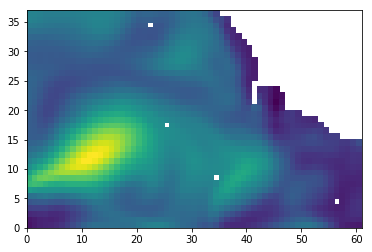

In [43]:
plt.pcolormesh(U[0,0]+V[0,0])

In [15]:
# U = Field('U', u[:24,0]+a[:24,0], dtype=np.float32,time=time,
#           lon=lon,
#           lat=lat,allow_time_extrapolation=True, mesh='spherical')
# V = Field('V', v[:24,0]+b[:24,0], dtype=np.float32,time=time,
#           lon=lon,
#           lat=lat,allow_time_extrapolation=True, mesh='spherical')
data = {'U': U, 'V': V}
lon = nc.longitude.data
lat = nc.latitude.data
time = np.linspace(0,3600*len(nc.time.data)-3600,len(nc.time.data))
dimensions = {'U': {'time':time,'lon': lon, 'lat': lat},
              'V': {'time':time,'lon': lon, 'lat': lat}}
fieldset = FieldSet.from_data(data, dimensions,allow_time_extrapolation=True)
fieldset.add_field(Field('Kh_zonal',      Kh_zonal*     np.ones((len(lat),len(lon))), lon, lat,mesh='spherical'))
fieldset.add_field(Field('Kh_meridional', Kh_meridional*np.ones((len(lat),len(lon))), lon, lat,mesh='spherical'))

In [48]:
import datetime
lonW = 18.5412452 #western part of deployment box
lonE = 18.5412452 #eastern part of deployment box
latS = -34.2499815#southern part of deployment box
latN = -34.2499815#northern part of deployment box
lons, lats = np.meshgrid(np.linspace(lonW,lonE,15), np.linspace(latS,latN,15))

pset = ParticleSet.from_list(fieldset=fieldset, pclass=JITParticle, lon=lons, 
                             lat=lats,time=datetime.datetime(2019,3,15,19,))
try: os.remove("nsri_test1.nc")
except:  pass

output_file = pset.ParticleFile(name="nsri_test1",outputdt=timedelta(hours=1))
kernels = pset.Kernel(AdvectionRK4) + BrownianMotion2D
def DeleteParticle(particle, fieldset, time):
    print("deleting particle at (%g %g %g) at %g" % (particle.lon, particle.lat, particle.depth, time))
    particle.delete()

pset.execute(kernels, runtime=timedelta(days=2),dt=timedelta(hours=1),output_file=output_file,
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})

INFO: Compiled JITParticleAdvectionRK4BrownianMotion2D ==> /var/folders/r4/54mc4t2559d_d1fnkl99m38r0000gn/T/parcels-501/90512698108a0c1c4a6ec2bbe5988171.so
100% (172800.0 of 172800.0) |############| Elapsed Time: 0:00:12 Time:  0:00:12


In [49]:

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cmocean as cm
import xarray as xr
import pandas as pd
%pylab inline

proj=ccrs.Mercator()
pc = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 12),dpi=360)



Populating the interactive namespace from numpy and matplotlib


/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 7200x4320 with 0 Axes>

In [30]:
lon.shape

(14884, 101)

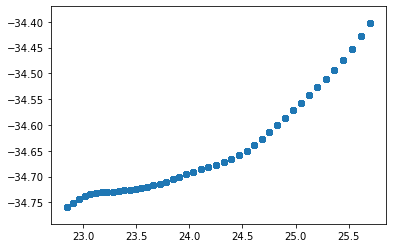

In [47]:
lon

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [108]:
nc = netCDF4.Dataset("surfboard_2.nc")

In [114]:
(nc.variables["time"][1,1] - nc.variables["time"][1,0])/3600

24.035555555555554

/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


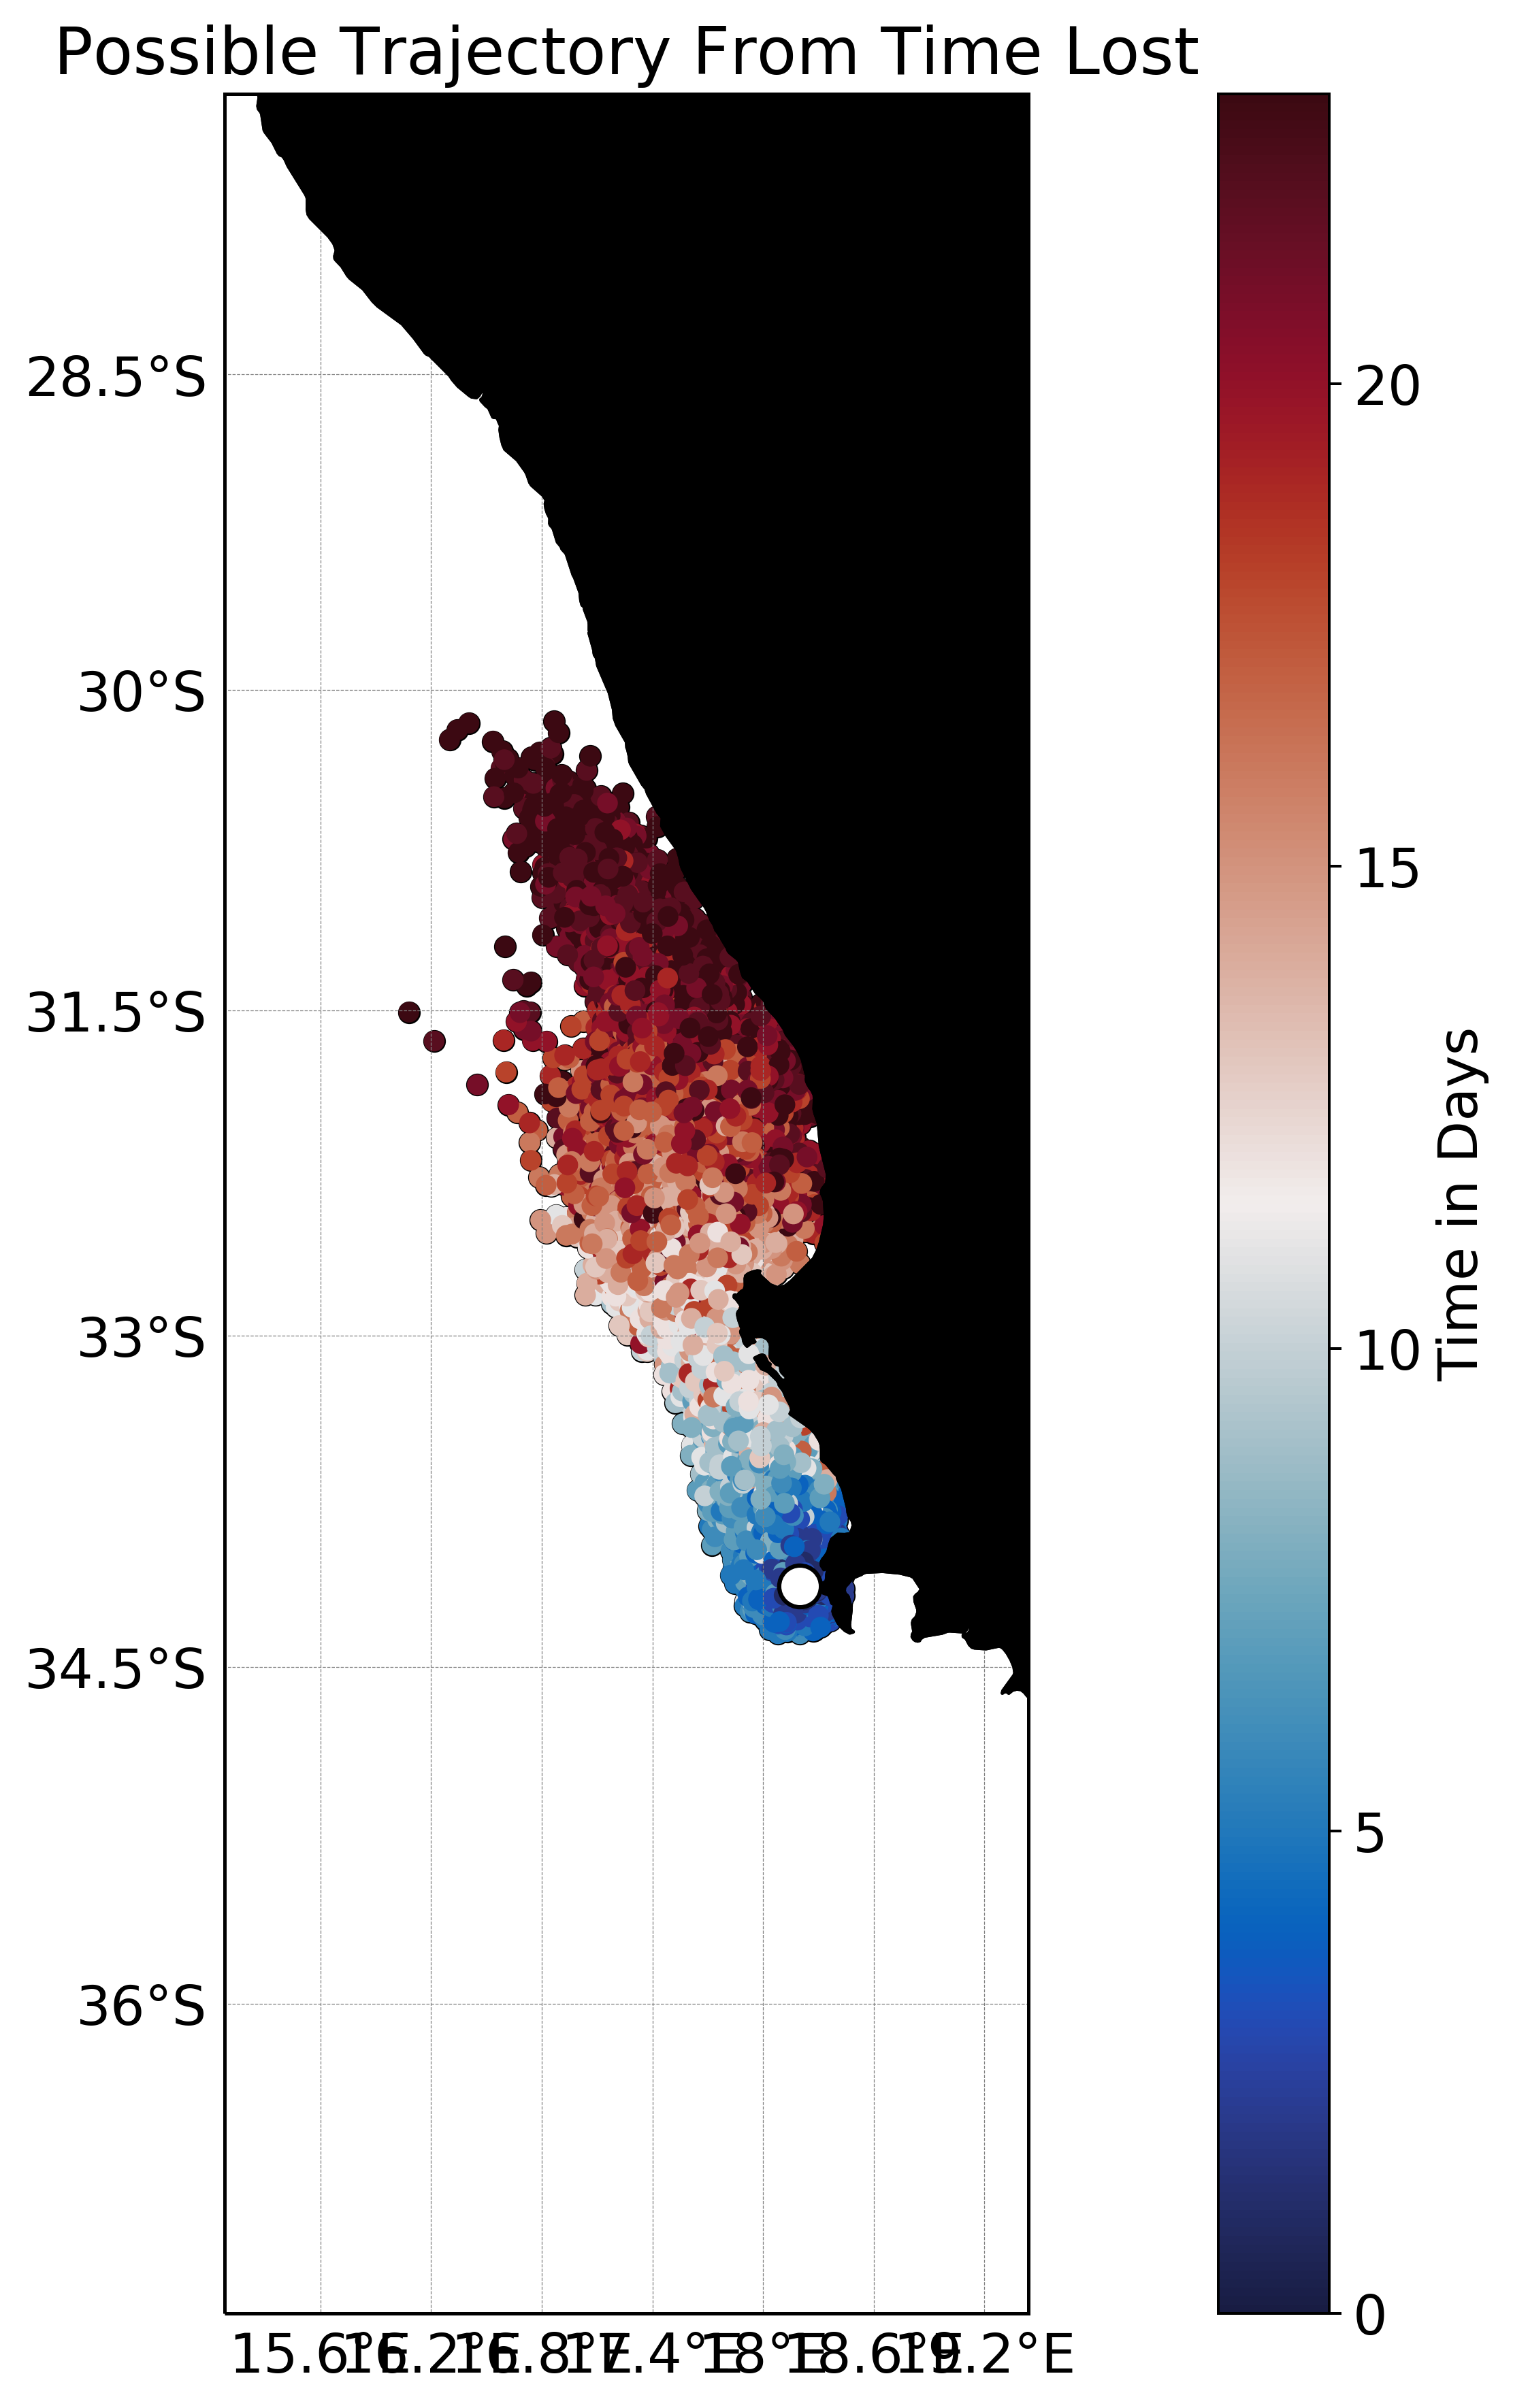

In [116]:
import cmocean as cmo
plt.rcParams.update({'font.size': 16})

res = '10m'
fig = plt.figure(figsize=(20, 12),dpi=360)

land = cfeature.NaturalEarthFeature('physical', 'land', res,
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
dc.close()
dc = xr.open_dataset("surfboard_2.nc",decode_times=False)
lon = np.array(dc.lon[:,:24])
lat = np.array(dc.lat[:,:24])
t =  np.arange(0,len(dc.time[0]),1)
t = np.repeat(t[np.newaxis,:], len(dc.trajectory), axis=0)
timaa = t[:,:24]

extent=[np.nanmin(lon)-1, 
        np.nanmax(lon)+1,
        np.nanmin(lat)-3,
        np.nanmax(lat)+3]

states = cfeature.NaturalEarthFeature('cultural',
                                          name='admin_1_states_provinces_lines',
                                          scale=res, facecolor='none')
proj=ccrs.Mercator()
ax = plt.subplot(1,1,1, projection=proj)
pc = ccrs.PlateCarree()

ax.set_extent(extent, pc)
ax.add_feature(land, facecolor='black',zorder=10)
ax.coastlines(resolution=res, zorder=11) 

ax.scatter(lon,lat,s=32,transform=pc, color='k')
cb = ax.scatter(lon,lat,c=timaa,s=26,transform=pc, cmap=cmo.cm.balance,)

# ax.plot(lon[:,:].T, lat[:,:].T, '--', linewidth=0.52, alpha=1,c='slateblue',zorder=10,transform=pc)
ax.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='k',alpha=1,ms=25)
ax.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='w',alpha=1,ms=20)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.25, 
                  color='gray', alpha=1, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}

ax.plot(20.1222,-35.02199, marker = ".", zorder=12,transform=pc,color='k',alpha=1,ms=25)
ax.plot(20.1222,-35.02199, marker = ".", zorder=12,transform=pc,color='w',alpha=1,ms=20)

ax.scatter(np.mean(lon,axis=0)[:],np.mean(lat,axis=0)[:],s=32,transform=pc, color='orange')

plt.tight_layout()
plt.title("Possible Trajectory From Time Lost")
cbar = plt.colorbar(cb)
cbar.set_label("Time in Days")
plt.show()
    

(961, 120)

Populating the interactive namespace from numpy and matplotlib


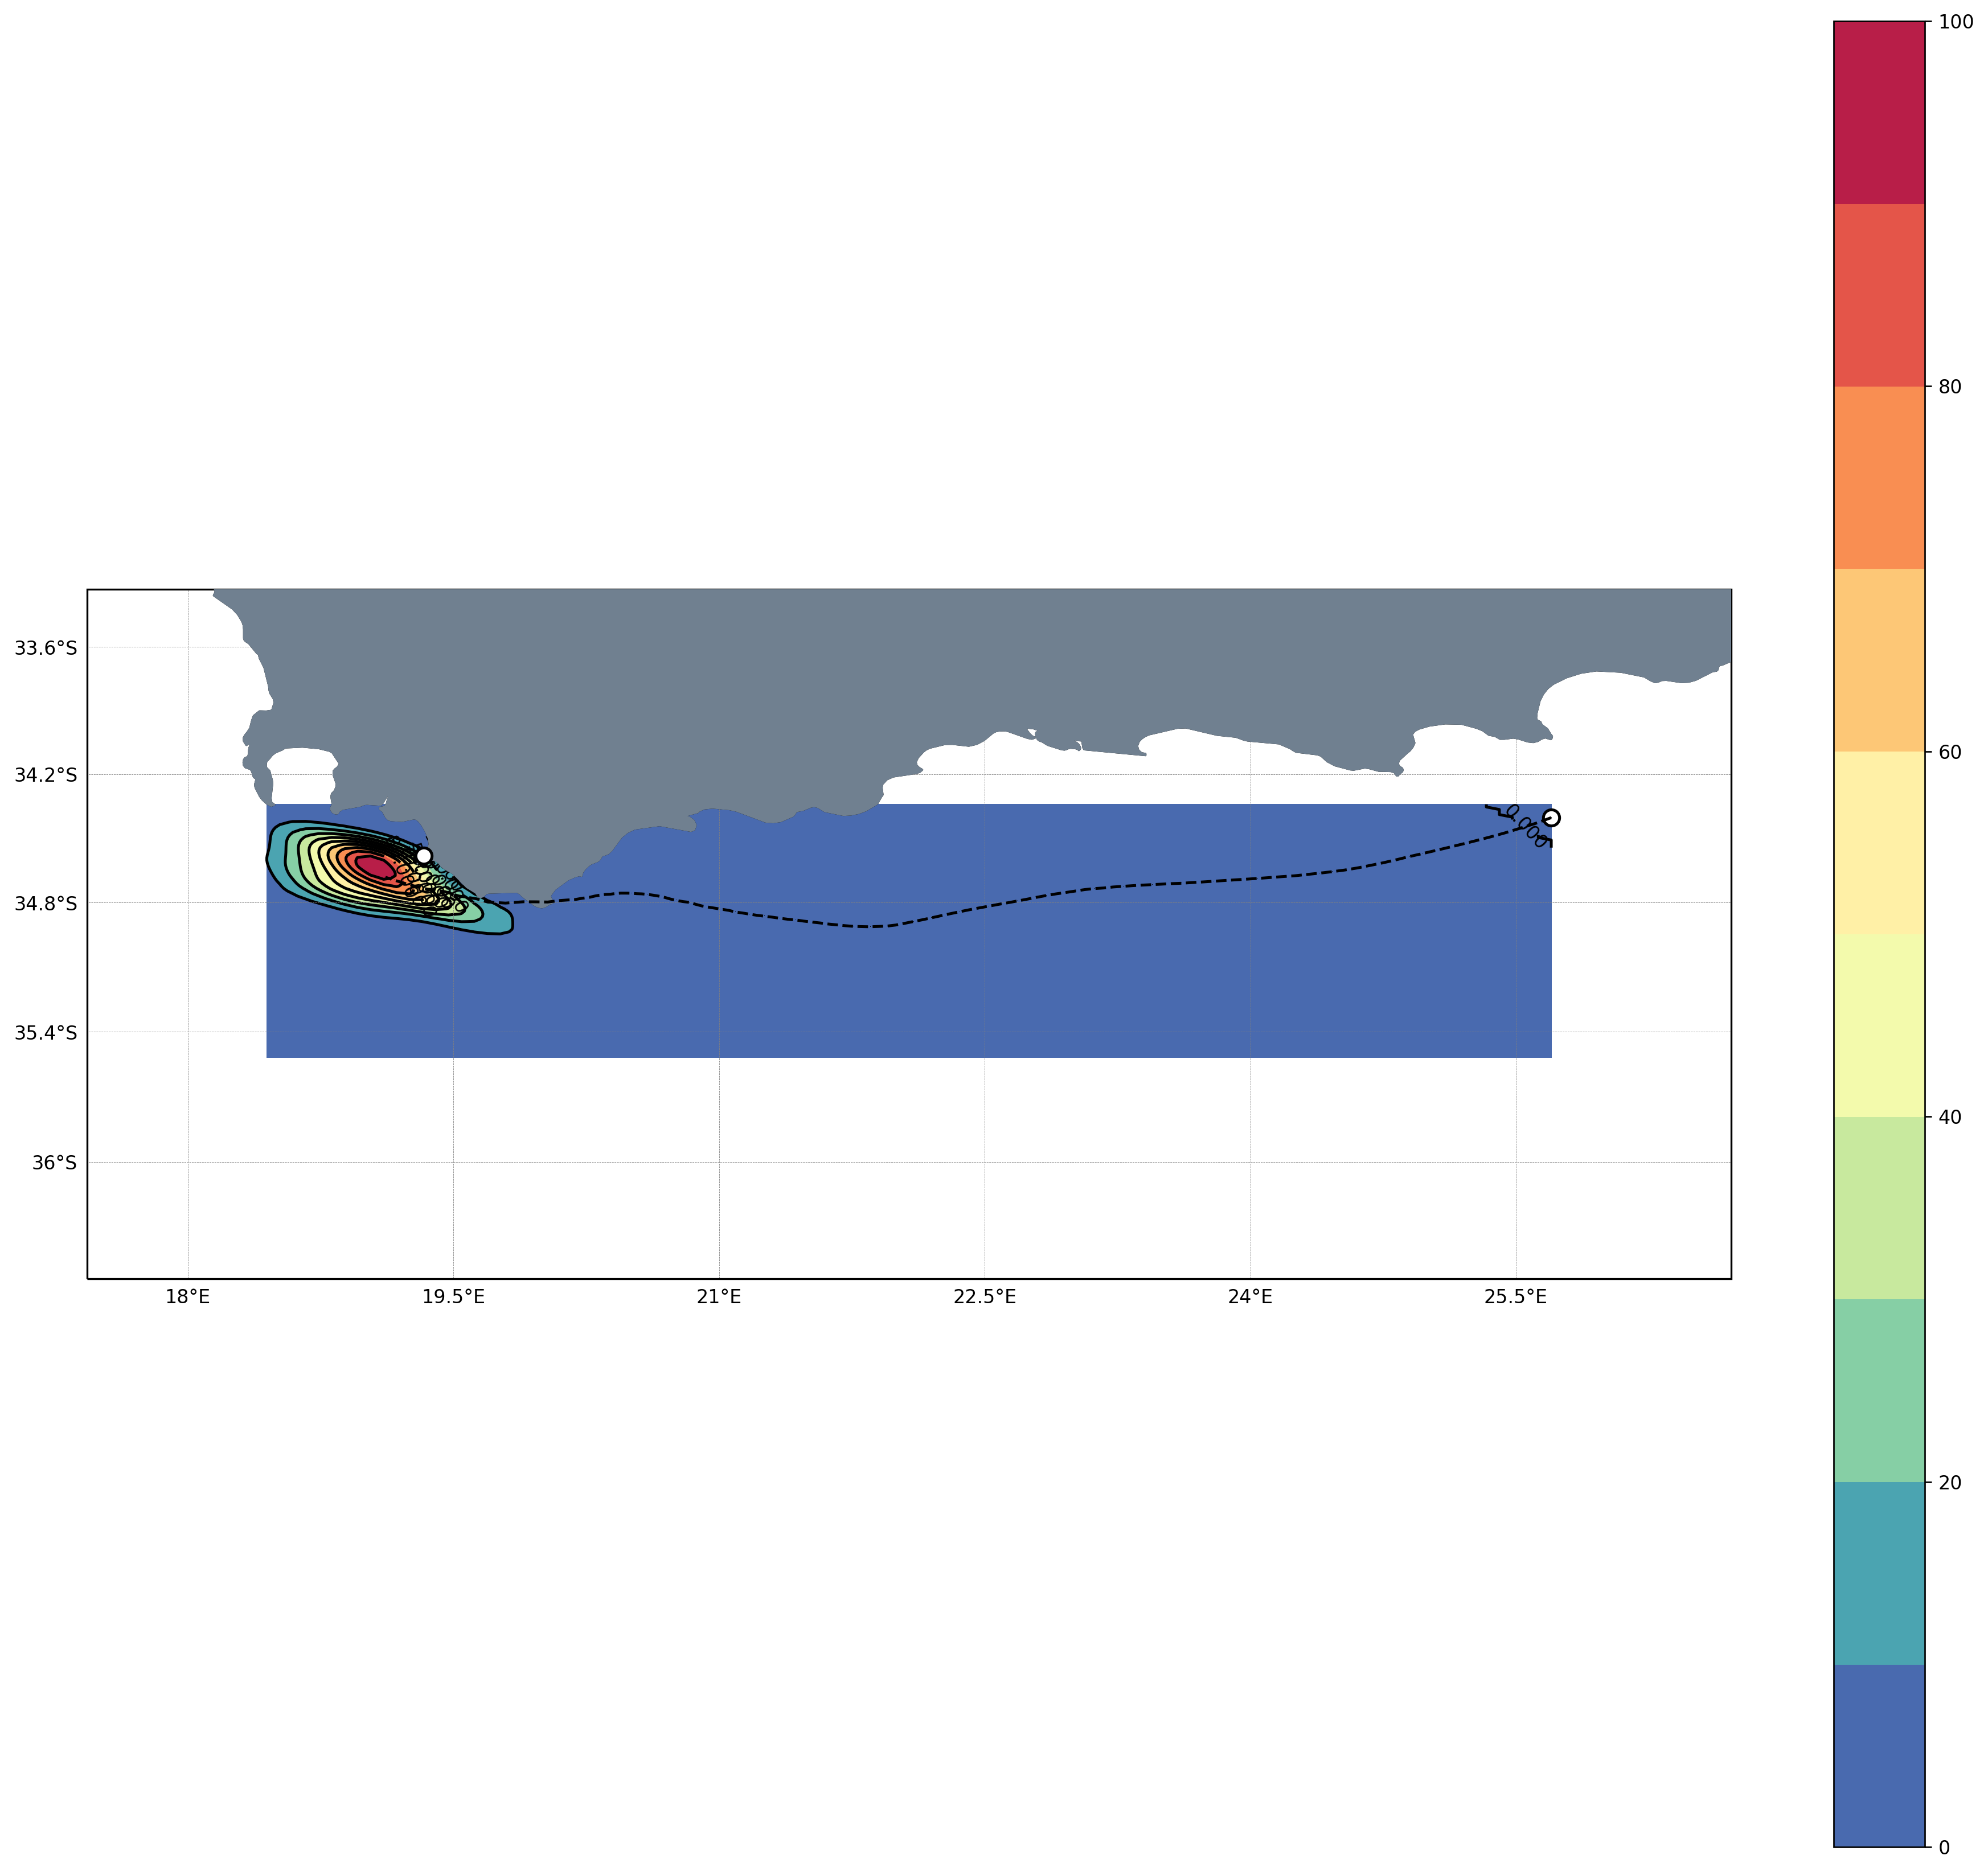

In [51]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import netCDF4
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
# import cmocean.cm as cmo

# pcc.close()
pcc = netCDF4.Dataset("caps_all_500.nc") 
x2  = pcc.variables["lon"][:,-1]
y2  = pcc.variables["lat"][:,-1]
lon = pcc.variables["lon"][:,:]
lat = pcc.variables["lat"][:,:]

xd = np.array(x2)
yd = np.array(y2)


data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = xd[~np.isnan(xd)]
y = yd[~np.isnan(yd)]
xmin, xmax = lon.min(), lon.max()
ymin, ymax = lat.min(), lat.max()

res = '10m' #50 and 10m
fig = plt.figure(figsize=(19.4, 17.7), dpi=240)

land = cfeature.NaturalEarthFeature('physical', 'land', res,
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
states = cfeature.NaturalEarthFeature('cultural',
                                          name='admin_1_states_provinces_lines',
                                          scale=res, facecolor='none')
proj=ccrs.Mercator()
ax = plt.subplot(111, projection=proj)
pc = ccrs.PlateCarree()
extent=[lon.min()-1.015, 
        lon.max()+1.015,
        lat.min()-1.015,
        lat.max()+1.015]
ax.set_extent(extent, pc)
ax.add_feature(land, facecolor='slategray',zorder=4)
ax.coastlines(resolution=res)  # coastline re
cmap = plt.cm.Spectral_r
cmap.set_under(color='white')

ax.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='k',alpha=1,ms=18)
ax.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='w',alpha=1,ms=12)
ax.plot(np.nanmean(lon,axis=0).T,np.nanmean(lat,axis=0).T,
        "--,", zorder=13,transform=pc,color='black',alpha=1,ms=12)
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
yy [xx == 0] = np.nan
xx [yy == 0] = np.nan
cfset = ax.contourf(xx, yy, f/f.max()*100,transform=pc, cmap=cmap,vmin=0.1,
                    levels=[0,10,20,30,40,50,60,70,80,90,100],vmax=100)
cset = ax.contour(xx, yy, f/f.max()*100,transform=pc, colors='k',vmax=100,
                  levels=[0,10,20,30,40,50,60,70,80,90,100])
# Label plot

pc = ccrs.PlateCarree()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.25, 
                  color='gray', alpha=1, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False

ax.plot(19.330336, -34.579543,  marker = ".", zorder=12,transform=pc,color='k',alpha=1,ms=18)
ax.plot(19.330336, -34.579543,  marker = ".", zorder=12,transform=pc,color='w',alpha=1,ms=12)
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')
#ax.scatter(lon[:,-1],lat[:,-1],transform=pc,zorder=100)
plt.colorbar(cfset)
plt.show()

In [13]:
pcc.variables["lon"][:,-1]

masked_array(data=[19.49903 , 19.091663, 19.633936, 19.45338 , 19.277071,
                   19.5864  , 19.486826, 19.322323, 19.21158 , 19.418325,
                   19.527225, 19.235859, 19.000961, 19.422915, 19.652092,
                   19.146738, 19.364908, 18.88507 , 19.53493 , 19.087631,
                   19.36728 , 19.21387 , 19.515514, 19.434921, 19.626163,
                   19.272844, 19.364008, 19.37337 , 19.43595 , 19.393335,
                   19.667356, 19.07045 , 19.42191 , 19.646194, 19.458384,
                   19.463495, 19.353975, 18.93682 , 19.40914 , 19.113544,
                   19.201147, 19.399393, 19.43984 , 18.918583, 19.380268,
                   19.495817, 19.031767, 18.942179, 19.338858, 19.565767,
                   19.375921, 19.526888, 19.220993, 19.177885, 19.59073 ,
                   18.915201, 18.943272, 19.187368, 19.431805, 19.21838 ,
                   19.46595 , 19.361406, 19.299147, 19.533587, 18.993992,
                   19.174597, 19.55838